In [ ]:
!pip install anthropic

In [8]:
import os
os.environ["ANTHROPIC_API_KEY"] = 'api_key'

In [19]:
import os
import base64
from anthropic import Anthropic

# Set up the Anthropic client
anthropic = Anthropic()

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

def test_text_only(prompt):
    message = anthropic.messages.create(
        model="claude-3-opus-20240229",
        max_tokens=1000,
        messages=[
            {"role": "user", "content": prompt}
        ]
    )
    return message.content

def test_image_and_text(image_path, prompt):
    base64_image = encode_image(image_path)

    message = anthropic.messages.create(
        model="claude-3-opus-20240229",
        max_tokens=1000,
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "image",
                        "source": {
                            "type": "base64",
                            "media_type": "image/jpeg",
                            "data": base64_image
                        }
                    },
                    {
                        "type": "text",
                        "text": prompt
                    }
                ]
            }
        ]
    )
    return message.content

# Test text-only capabilities
text_prompt = "Explain the concept of quantum entanglement in simple terms."
text_response = test_text_only(text_prompt)
print("Text-only response:")
print(text_response)
print("\n" + "="*50 + "\n")

Text-only response:
[TextBlock(text='Quantum entanglement is a phenomenon in quantum physics where two or more particles become interconnected in such a way that they can no longer be described independently, regardless of the distance between them. In other words, the quantum state of each particle cannot be described without referring to the state of the other(s), even if the particles are separated by vast distances.\n\nHere\'s a simplified analogy to help understand the concept:\n\nImagine a pair of gloves - a left glove and a right glove. If you put each glove in a separate box and send them to opposite ends of the universe, they still remain connected in a sense. If you open one box and find a left glove, you instantly know that the other box contains a right glove, without having to open it. The gloves are "entangled" because their states are correlated.\n\nSimilarly, in quantum entanglement, when two particles (like photons or electrons) become entangled, measuring a property o

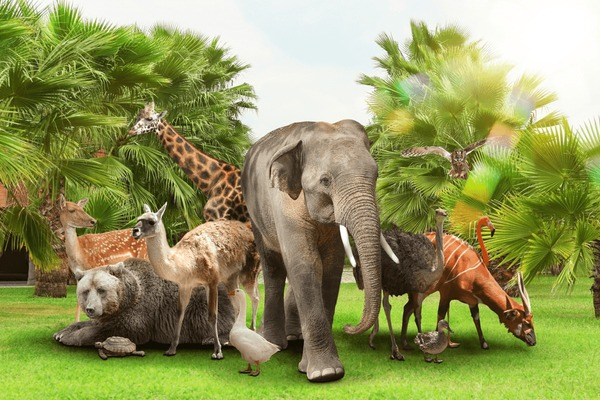

Image and text response:
[TextBlock(text="The image depicts a group of various animals gathered together on a lush green lawn with palm trees and other greenery in the background.\n\nIn the center is a large elephant, its gray wrinkled skin contrasting with the vibrant surroundings. The elephant appears to be standing calmly amidst the menagerie of creatures around it.\n\nTo the left of the elephant are a giraffe and an ostrich. The giraffe's long neck stretches upwards, while the ostrich stands tall on its powerful legs, its distinctive plumage visible.\n\nOn the right side, a grizzly bear sits on the grass, its thick brown fur and powerful build unmistakable. Next to the bear are a fox and a deer, the fox's reddish coat and pointed ears distinguishing it from the deer's slender frame and gentle demeanor.\n\nIn the foreground, a sloth lays belly-down on the grass, its slow, languid pose typical of its species.\n\nThe entire scene has an almost surreal, harmonious quality, with animals

In [20]:
# Test image and text capabilities
image_path = "/content/many-different-animals-outdoors-on-600nw-2272395987.jpg"

from IPython.display import Image, display

# Display the image
display(Image(filename=image_path))

image_prompt = "Describe this image in detail."
image_response = test_image_and_text(image_path, image_prompt)
print("Image and text response:")
print(image_response)

In [24]:
import base64
import json
from anthropic import Anthropic

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

def create_message(model, messages, max_tokens=1000, system=None):
    try:
        params = {
            "model": model,
            "max_tokens": max_tokens,
            "messages": messages
        }
        if system:
            params["system"] = system

        message = anthropic.messages.create(**params)
        return message.content
    except Exception as e:
        return f"Error: {str(e)}"

def test_system_prompt(system_prompt, user_prompt):
    return create_message("claude-3-opus-20240229", [{"role": "user", "content": user_prompt}], system=system_prompt)

def test_json_response(prompt):
    system_prompt = "You are a helpful assistant that always responds in valid JSON format."
    user_prompt = f"{prompt} Respond in JSON format."
    response = create_message("claude-3-opus-20240229", [{"role": "user", "content": user_prompt}], system=system_prompt)

    try:
        return json.loads(response)
    except json.JSONDecodeError:
        return {"error": "Failed to parse JSON response", "raw_response": response}

def test_conversation(prompts):
    conversation = []
    for prompt in prompts:
        conversation.append({"role": "user", "content": prompt})
        response = create_message("claude-3-opus-20240229", conversation)
        conversation.append({"role": "assistant", "content": response})
        print(f"User: {prompt}\nAssistant: {response}\n")

In [25]:
# Test system prompt
system_prompt = "You are a helpful assistant with expertise in astrophysics."
user_prompt = "Explain the concept of black holes."
system_prompt_response = test_system_prompt(system_prompt, user_prompt)
print("System Prompt Response:")
print(system_prompt_response)
print("\n" + "="*50 + "\n")

System Prompt Response:
[TextBlock(text='Black holes are regions of spacetime where gravity is so intense that nothing, not even light, can escape from within. They are formed when massive stars collapse at the end of their life cycles, or when extremely dense regions of matter are present.\n\nKey characteristics of black holes include:\n\n1. Event horizon: The boundary of a black hole, beyond which nothing can escape the gravitational pull.\n\n2. Singularity: The center of a black hole, where the mass is compressed into an infinitely small space, and the laws of physics as we understand them break down.\n\n3. Gravitational time dilation: Time appears to slow down near a black hole due to its intense gravitational field.\n\n4. Accretion disk: Matter that falls towards a black hole forms a disk around it, which can emit intense radiation as the matter is heated by friction and gravitational forces.\n\nTypes of black holes:\n\n1. Stellar-mass black holes: Formed from the collapse of mass

In [27]:
# Test conversation
conversation_prompts = [
    "What is machine learning?",
    "Can you give an example of a machine learning application?",
    "What are some challenges in implementing machine learning?"
]
print("Conversation Test:")
test_conversation(conversation_prompts)

Conversation Test:
User: What is machine learning?
Assistant: [TextBlock(text='Machine learning is a subset of artificial intelligence (AI) that focuses on creating algorithms and statistical models that enable computer systems to improve their performance on a specific task without being explicitly programmed. In other words, it allows computers to learn and make predictions or decisions based on data, without being explicitly programmed for each specific case.\n\nThe main idea behind machine learning is to train a model using a large amount of data, allowing it to identify patterns, learn from examples, and make predictions or decisions when presented with new, unseen data.\n\nThere are three main types of machine learning:\n\n1. Supervised learning: The algorithm learns from labeled data, where both input data and the corresponding output (or target) are provided. The goal is to learn a function that maps input data to the correct output labels, enabling the model to make prediction